<a href="https://colab.research.google.com/github/Carhuacusma/CC61_PDI_TA4_u201818067/blob/main/PDI_TA4_u201818067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento Digital de Imágenes - Detección y segmentación

## Objetivos:

##Ejercicio: Detección y Segmentación

### Detección de descontinuidades

En imágenes, las descontinuidades buscadas son puntos, segmentos de rectas, bordes y uniones

"La representación de los bordes en una imagen reduce significativamente la cantidad de data a ser procesada, reteniendo información esencial sobre las formas de los objetos en escena"

## Código

###Importando librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage import io, filters, img_as_ubyte
from google.colab.patches import cv2_imshow

###Operadores de Detección de bordes

#### Operador de Roberts

In [ ]:
def roberts(baw, arr=[True for _ in range(2)]): # baw: Imagen en escala de grises; x,y: booleans de en qué eje aplicar
  x = arr[0]
  y = arr[1]
  m_x = np.array([[ 1, 0],
                  [ 0,-1]])
  m_y = np.array([[-1, 0],
                  [ 0, -1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Sobel / Prewitt

In [5]:
def sobel_prewitt(baw, c=2, arr=[True for _ in range(2)]):
  x = arr[0]
  y = arr[1]
  m_x = np.array([[-1, 0, 1],
                  [-c, 0, c],
                  [-1, 0, 1]])
  m_y = np.array([[ 1, c, 1],
                  [ 0, 0, 0],
                  [-1,-c,-1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Kirsch

In [ ]:
def kirsch(baw,arr=[True for _ in range(8)]):
  mascaras = [np.array([[ 5, 5, 5],
                        [-3, 0,-3],
                        [-3,-3,-3]]),
              np.array([[-3, 5, 5],
                        [-3, 0, 5],
                        [-3,-3,-3]]),
              np.array([[-3,-3, 5],
                        [-3, 0, 5],
                        [-3,-3, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0, 5],
                        [-3, 5, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0,-3],
                        [ 5, 5, 5]]),
              np.array([[-3,-3,-3],
                        [ 5, 0,-3],
                        [ 5, 5,-3]]),
              np.array([[ 5,-3,-3],
                        [ 5, 0,-3],
                        [ 5,-3,-3]]),
              np.array([[ 5, 5,-3],
                        [ 5, 0,-3],
                        [-3,-3,-3]])]
  print(arr)    
  final = np.zeros(baw.shape,dtype=np.uint8)
  for i in range(8):
    if arr[i]:
      filtrada = cv2.filter2D(baw,-1,mascaras[i])
      final = final + filtrada
  return final

[True, True, False, False, False, False, False, False]


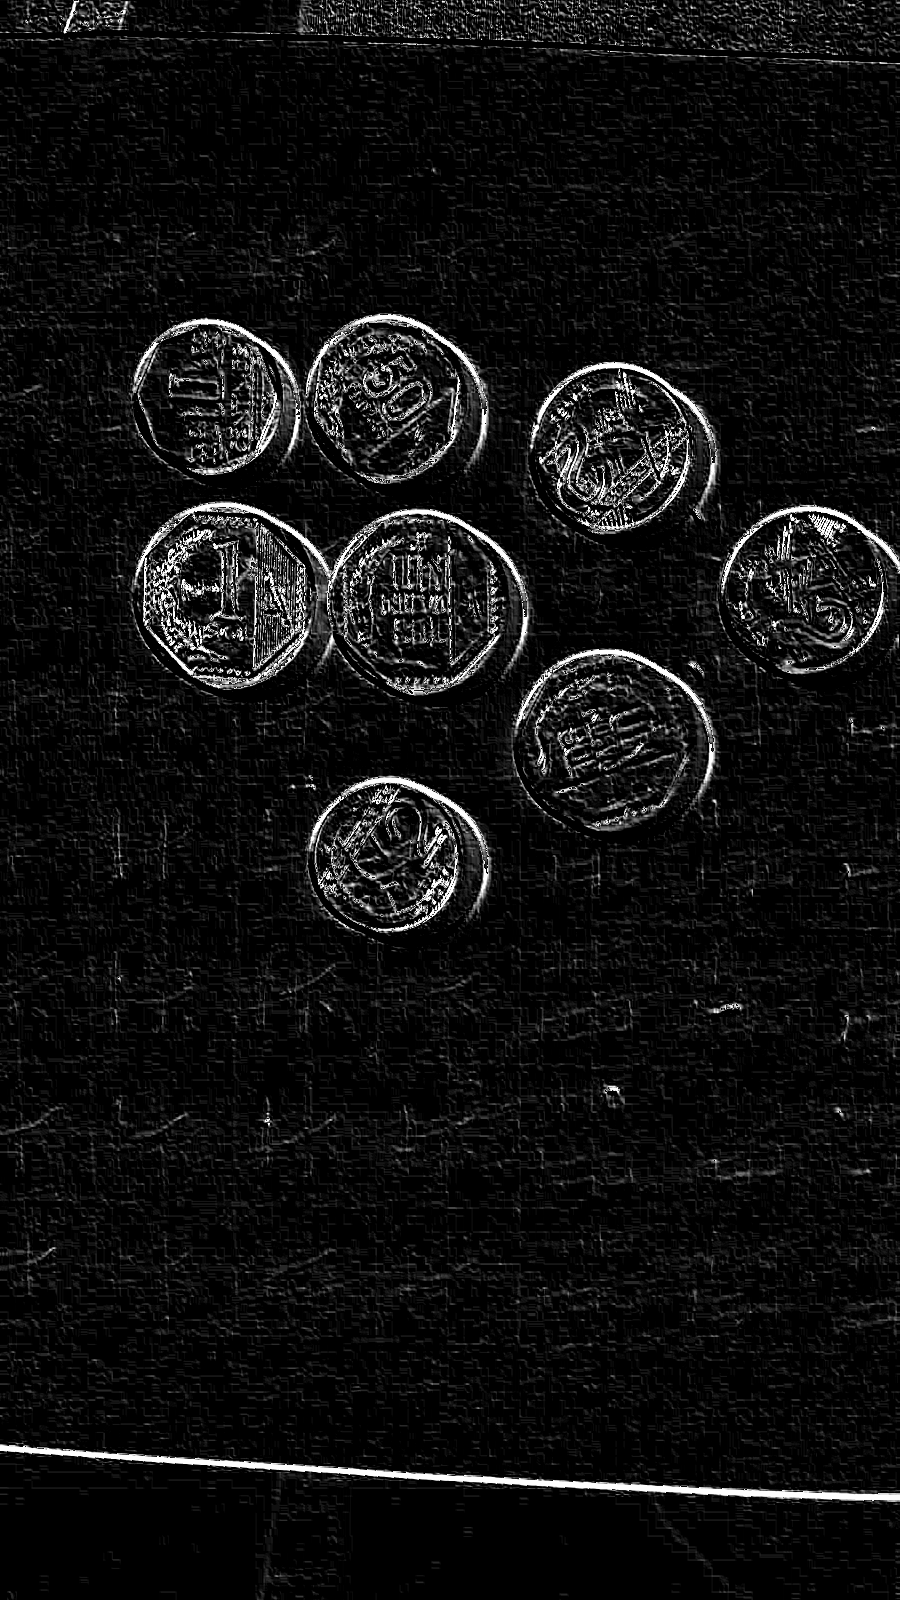

In [ ]:
cv2_imshow(kirsch(baw,arr=[True,True,False,False,False,False,False,False]))

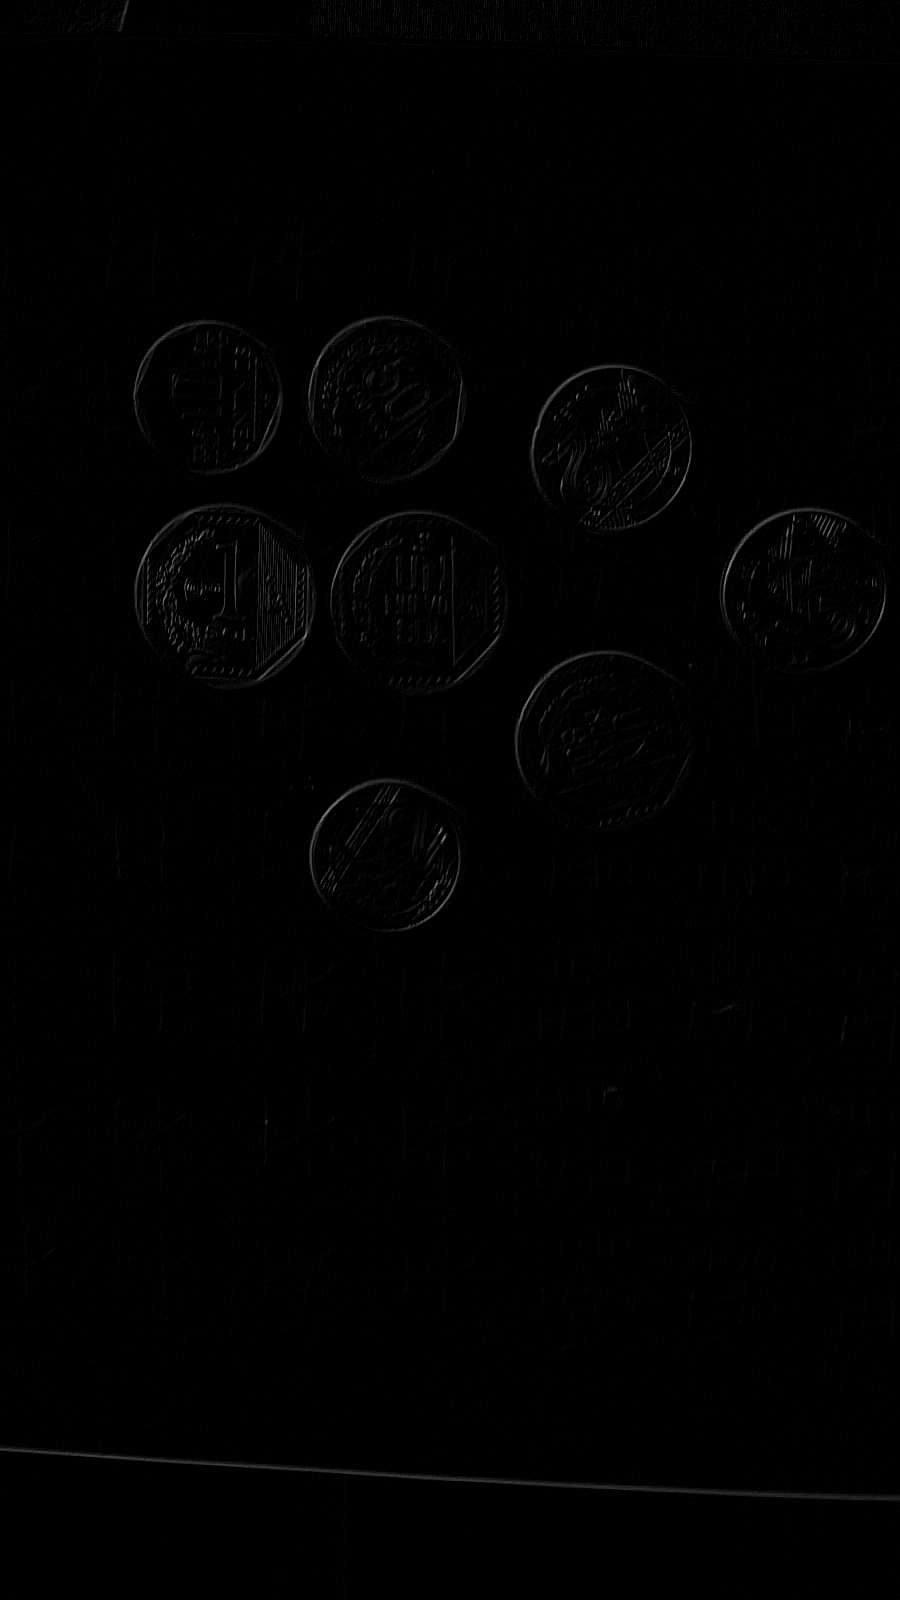

In [ ]:
cv2_imshow(roberts(baw,arr=[True,False]))

###Cargando la imagen

In [39]:
imagen = io.imread("https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/fondoHoja.jpg")
print(type(imagen))

<class 'numpy.ndarray'>


In [ ]:
def edgeDetection(imagen, operador, arr = [True for _ in range(8)]):
  # Si la imagen no está en escala de grises, convertirla a escala de grises
  if len(imagen.shape) > 2:
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
  filtro = operador(imagen,arr) # --- Imagen Filtrada
  if type(aux[0][0]) != np.uint8: #...Si el 'operador' es función de skimage devuelve float
    filtro = img_as_ubyte(filtro) #..... Homogeneizar para trabajar en np.uint8 ...........
  return filtro

In [18]:
aux = sobel_prewitt(baw)

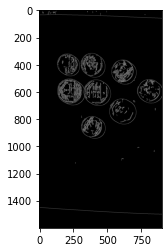

In [71]:
#@title Canny { run: "auto" }
minC = 45#@param{type:"slider", min:0, max:254, step:1}
maxC = 124#@param{type:"slider", min:0, max:255, step:1}
im_canny = cv2.Canny(imagen,minC,maxC)
plt.imshow(im_canny,cmap='gray')

In [8]:
baw = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)

In [78]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, baw.shape[0]/16, param1=170, param2=40, minRadius=40, maxRadius=100)

In [79]:
src = imagen.copy()
if circles is not None:
  print("I'm here")
  circles = np.uint16(np.around(circles))
  for i in circles[0, :]:
    center = (i[0], i[1])
    # circle center
    cv2.circle(src, center, 1, (0, 100, 100), 3)
    # circle outline
    radius = i[2]
    cv2.circle(src, center, radius, (255, 0, 255), 3)

I'm here


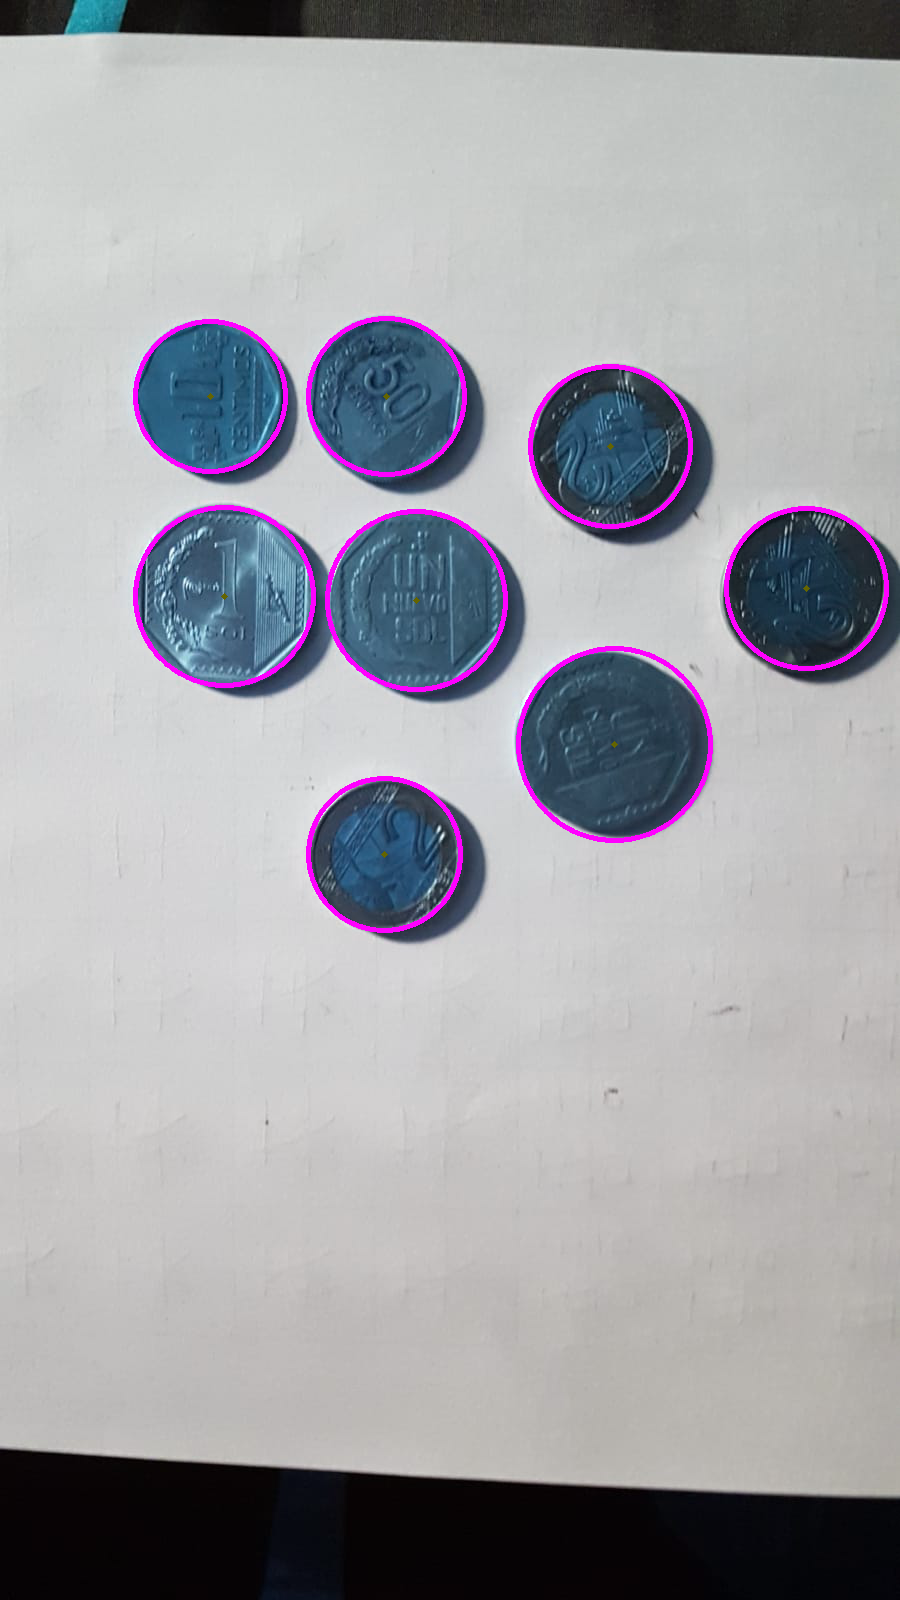

In [80]:
cv2_imshow(src)

## Conclusiones

## Bibliografía

* Sharifi, M., Fathy, M. & Tayefeh Mahmoudi, M. (2002) *A Classified and Comparative Study of Edge Detection Algorithms*. Recuperado de: https://d1wqtxts1xzle7.cloudfront.net/34225837/01000371.pdf?1405616223=&response-content-disposition=inline%3B+filename%3DA_Classified_and_Comparative_Study_of_Ed.pdf&Expires=1603141615&Signature=G5vV07WSN8ZB-lvqXGo1zZBjAzwqH4qSWBkv5CBbpmPeU47BV1rQfoMrmzLFDI8gqyLAycqoZt7bgLSA0aTgkA6C0RZDpKbXvLuwKrlVFgOBYoGp~5YEhTbKvsE7HClxTuGlG82a6hIi5RijGuzdXWMrfxfAWs3~jP5Zu92I2FVDRh-qbNWDwill--JVmLP2Gg5sKA1BEmbjJAZ7oYsbX9I8tiruHgJydaDVyOreZZ7QhnBV6yJFph7~kUZRLihJELKZtXyP84gSFrklQbkeK1V18fqDft--~dLU7sUcVURErnhXOL7M2iqcsx1dyzANUxqR6R9vC4WT12Vz3VyPdw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA 
* Martinez, J. (2020) *Understanding and implementing shape detection using Hough Transform with OpenCV and Python*. Recuperado de: https://livecodestream.dev/post/2020-05-26-hough-transformation/ 
* Rani, R. & Kumari, S. (2016) *An approach of detecting discontinuities in images*. Recuperado de: https://pdfs.semanticscholar.org/55e0/6c28291d943aaa481ecd669bce328d54fe74.pdf 
* Programmer Sought. Roberts, Sobel, Prewitt TODO.Recuperado de: https://www.programmersought.com/article/2672737346/ 